In [21]:
import matplotlib.pyplot as plt
import pickle

In [22]:
step_arr,diff,acc,dev_diff,dev_acc=pickle.load( \
    open('visualize.pkl', mode='rb'))

In [ ]:
def sequence_mask(lengths, maxlen=None):
    if maxlen is None:
        maxlen = lengths.max()
    row_vector = torch.arange(0, maxlen, 1)
    matrix = torch.unsqueeze(lengths, dim=-1)
    mask = row_vector < matrix

    mask = mask.float()
    return mask

In [24]:
import torch

In [25]:
length = torch.from_numpy(np.array([4,2,7]))

In [26]:
length

tensor([4, 2, 7])

In [33]:
maxlen = length.max()
row_vector = torch.arange(0, maxlen, 1)
print(row_vector)
matrix = torch.unsqueeze(length, dim=-1)
print(matrix)
mask = row_vector < matrix
mask = mask.float()
mask = torch.unsqueeze(mask,dim=-1)
print(mask)

tensor([0, 1, 2, 3, 4, 5, 6])
tensor([[4],
        [2],
        [7]])
tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.]],

        [[1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]])


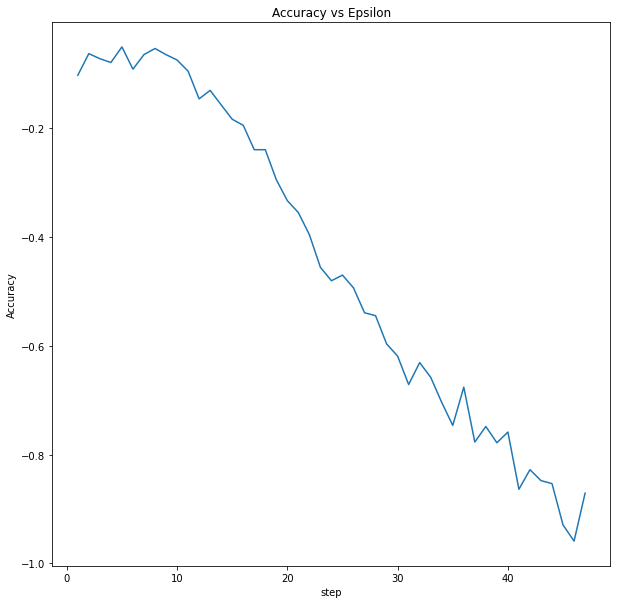

In [16]:
plt.figure(figsize=(10,10))
#plt.plot(step_arr, acc, "*-")
plt.plot(step_arr, dev_diff, "-")
#plt.yticks(np.arange(0, 1.1, step=0.1))
#plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("step")
plt.ylabel("Accuracy")
plt.show()

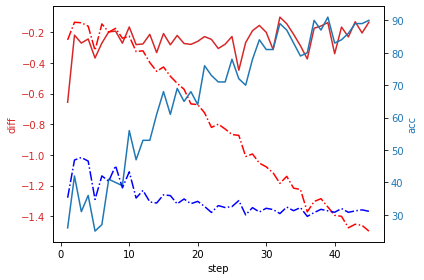

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('step')
ax1.set_ylabel('diff', color=color)
ax1.plot(step_arr, diff, color=color)
ax1.plot(step_arr, dev_diff, 'r-.')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('acc', color=color)  # we already handled the x-label with ax1
ax2.plot(step_arr, acc, color=color)
ax2.plot(step_arr, dev_acc, 'b-.')

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()